In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import holidays
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
tqdm.pandas()


In [2]:
df = pd.read_csv("/kaggle/input/playground-series-s3e19/train.csv")

In [3]:
df

,id,date,country,store,product,num_sold
0,0,2017-01-01,Argentina,Kaggle Learn,Using LLMs to Improve Your Coding,63
1,1,2017-01-01,Argentina,Kaggle Learn,Using LLMs to Train More LLMs,66
2,2,2017-01-01,Argentina,Kaggle Learn,Using LLMs to Win Friends and Influence People,9
3,3,2017-01-01,Argentina,Kaggle Learn,Using LLMs to Win More Kaggle Competitions,59
4,4,2017-01-01,Argentina,Kaggle Learn,Using LLMs to Write Better,49
...,...,...,...,...,...,...
136945,136945,2021-12-31,Spain,Kagglazon,Using LLMs to Improve Your Coding,700
136946,136946,2021-12-31,Spain,Kagglazon,Using LLMs to Train More LLMs,752
136947,136947,2021-12-31,Spain,Kagglazon,Using LLMs to Win Friends and Influence People,111
136948,136948,2021-12-31,Spain,Kagglazon,Using LLMs to Win More Kaggle Competitions,641


In [4]:
df["country"].unique()

array(['Argentina', 'Canada', 'Estonia', 'Japan', 'Spain'], dtype=object)

The holidays might affect the sales 

In [5]:
df["day_of_week"] = pd.to_datetime(df["date"]).dt.weekday

In [6]:
def holiday_encoding(row):#country, day, day_of_week):
    if row["country"] == "Argentina" and row["date"] in holidays.AR():
        return 1
    if row["country"] == "Canada" and row["date"] in holidays.CA():
        return 2
    if row["country"] == "Estonia" and row["date"] in holidays.EE():
        return 3
    if row["country"] == "Japan" and row["date"] in holidays.JP():
        return 4
    if row["country"] == "Spain" and row["date"] in holidays.ES():
        return 5

    if row["day_of_week"] == 6:
        return 6 # Sunday
    
    return 0

In [7]:
df

,id,date,country,store,product,num_sold,day_of_week
0,0,2017-01-01,Argentina,Kaggle Learn,Using LLMs to Improve Your Coding,63,6
1,1,2017-01-01,Argentina,Kaggle Learn,Using LLMs to Train More LLMs,66,6
2,2,2017-01-01,Argentina,Kaggle Learn,Using LLMs to Win Friends and Influence People,9,6
3,3,2017-01-01,Argentina,Kaggle Learn,Using LLMs to Win More Kaggle Competitions,59,6
4,4,2017-01-01,Argentina,Kaggle Learn,Using LLMs to Write Better,49,6
...,...,...,...,...,...,...,...
136945,136945,2021-12-31,Spain,Kagglazon,Using LLMs to Improve Your Coding,700,4
136946,136946,2021-12-31,Spain,Kagglazon,Using LLMs to Train More LLMs,752,4
136947,136947,2021-12-31,Spain,Kagglazon,Using LLMs to Win Friends and Influence People,111,4
136948,136948,2021-12-31,Spain,Kagglazon,Using LLMs to Win More Kaggle Competitions,641,4


In [8]:
df["holiday"] = df.progress_apply(holiday_encoding, axis=1)

  0%|          | 0/136950 [00:00<?, ?it/s]

Encoding remain features

In [9]:
df["country"] = pd.factorize(df["country"])[0] + 1
df["store"] = pd.factorize(df["store"])[0] + 1
df["product"] = pd.factorize(df["product"])[0] + 1

In [10]:
df

,id,date,country,store,product,num_sold,day_of_week,holiday
0,0,2017-01-01,1,1,1,63,6,1
1,1,2017-01-01,1,1,2,66,6,1
2,2,2017-01-01,1,1,3,9,6,1
3,3,2017-01-01,1,1,4,59,6,1
4,4,2017-01-01,1,1,5,49,6,1
...,...,...,...,...,...,...,...,...
136945,136945,2021-12-31,5,3,1,700,4,0
136946,136946,2021-12-31,5,3,2,752,4,0
136947,136947,2021-12-31,5,3,3,111,4,0
136948,136948,2021-12-31,5,3,4,641,4,0


In [11]:
df_train = df.drop(["id", "date", "day_of_week"], axis=1)
X = df_train.drop(["num_sold"], axis=1)
y = df_train["num_sold"]

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


<Axes: >

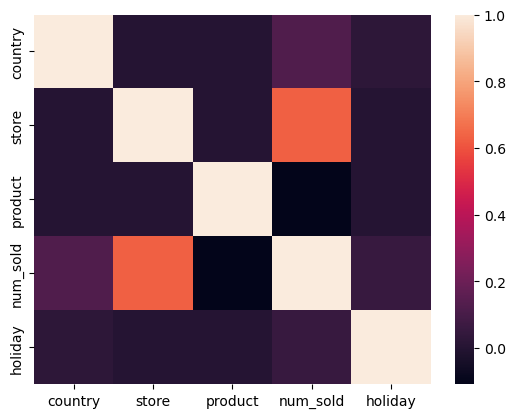

In [12]:
import seaborn as sns

sns.heatmap(df_train.corr())

In [13]:
X

,country,store,product,holiday
0,1,1,1,1
1,1,1,2,1
2,1,1,3,1
3,1,1,4,1
4,1,1,5,1
...,...,...,...,...
136945,5,3,1,0
136946,5,3,2,0
136947,5,3,3,0
136948,5,3,4,0


In [14]:
y

0          63
1          66
2           9
3          59
4          49
         ... 
136945    700
136946    752
136947    111
136948    641
136949    539
Name: num_sold, Length: 136950, dtype: int64

In [15]:
from xgboost import XGBModel

In [16]:
model = XGBModel()

In [17]:
model.fit(X, y)

XGBModel()

In [18]:
test_df = pd.read_csv("/kaggle/input/playground-series-s3e19/test.csv")

In [19]:
test_df

,id,date,country,store,product
0,136950,2022-01-01,Argentina,Kaggle Learn,Using LLMs to Improve Your Coding
1,136951,2022-01-01,Argentina,Kaggle Learn,Using LLMs to Train More LLMs
2,136952,2022-01-01,Argentina,Kaggle Learn,Using LLMs to Win Friends and Influence People
3,136953,2022-01-01,Argentina,Kaggle Learn,Using LLMs to Win More Kaggle Competitions
4,136954,2022-01-01,Argentina,Kaggle Learn,Using LLMs to Write Better
...,...,...,...,...,...
27370,164320,2022-12-31,Spain,Kagglazon,Using LLMs to Improve Your Coding
27371,164321,2022-12-31,Spain,Kagglazon,Using LLMs to Train More LLMs
27372,164322,2022-12-31,Spain,Kagglazon,Using LLMs to Win Friends and Influence People
27373,164323,2022-12-31,Spain,Kagglazon,Using LLMs to Win More Kaggle Competitions


In [20]:
test_df["day_of_week"] = pd.to_datetime(test_df["date"]).dt.weekday
test_df["holiday"] = test_df.progress_apply(holiday_encoding, axis=1)

  0%|          | 0/27375 [00:00<?, ?it/s]

In [21]:
test_df["country"] = pd.factorize(test_df["country"])[0] + 1
test_df["store"] = pd.factorize(test_df["store"])[0] + 1
test_df["product"] = pd.factorize(test_df["product"])[0] + 1

In [22]:
ids = test_df["id"]

In [23]:
test_df

,id,date,country,store,product,day_of_week,holiday
0,136950,2022-01-01,1,1,1,5,1
1,136951,2022-01-01,1,1,2,5,1
2,136952,2022-01-01,1,1,3,5,1
3,136953,2022-01-01,1,1,4,5,1
4,136954,2022-01-01,1,1,5,5,1
...,...,...,...,...,...,...,...
27370,164320,2022-12-31,5,3,1,5,0
27371,164321,2022-12-31,5,3,2,5,0
27372,164322,2022-12-31,5,3,3,5,0
27373,164323,2022-12-31,5,3,4,5,0


In [24]:
test_df=test_df.drop(["id", "date"], axis=1)

In [25]:
test_df=test_df.drop(["day_of_week"], axis=1)

In [26]:
test_result = model.predict(test_df)

In [27]:
test_result

array([ 28.589037,  29.41554 ,   4.204388, ...,  66.94242 , 360.6018  ,
       328.8545  ], dtype=float32)

In [28]:
result_frame=pd.DataFrame(list(zip(ids, test_result)), columns=["id", "num_sold"])

In [29]:
result_frame

,id,num_sold
0,136950,28.589037
1,136951,29.415541
2,136952,4.204388
3,136953,24.682323
4,136954,23.222773
...,...,...
27370,164320,432.231537
27371,164321,427.327240
27372,164322,66.942421
27373,164323,360.601807


In [30]:
result_frame.to_csv("result.csv", index=False)